# Project 1: Part 3

In [78]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt

## Executive Summary

Here I will summarize the 5 most popular trips that I would call commuter trips and also my recommendations for offers. The reasoning for both of these is outlined througout the rest of the report. The 5 most popular trips that I would call commuter trips are between stations 50 and 61, 65 and 69, 51 and 70, 55 and 70, 50 and 70 in that order. My first recommendation in terms of offers is is a 10 dollar per month commuter plan that allows people to rent bikes between 6am-10am and 3pm-7pm. My second recommendation is to offer 3 free months of membership to all new customers that subscribe to a yearly plan in the cities of San Jose, Palo Alto, Redwood City and Mountain View. My third recommendation is to offer one time ride discounts of 50 cents in the same cities of San Jose, Palo Alto, Redwood City and Mountain View. In addition, we will offer 50 cent discounts on one time trips that start at stations 90, 61, 50, 77, and 2.

## Data Used

[bikeshare_stations](https://console.cloud.google.com/bigquery?project=bigquery-public-data&d=san_francisco&p=bigquery-public-data&t=bikeshare_stations&page=table&ws=!1m15!1m4!4m3!1sbigquery-public-data!2ssan_francisco!3sbikeshare_status!1m4!4m3!1sbigquery-public-data!2ssan_francisco!3sbikeshare_trips!1m4!4m3!1sbigquery-public-data!2ssan_francisco!3sbikeshare_stations)

[bikeshare_trips](https://console.cloud.google.com/bigquery?project=bigquery-public-data&d=san_francisco&p=bigquery-public-data&t=bikeshare_trips&page=table&ws=!1m10!1m4!4m3!1sbigquery-public-data!2ssan_francisco!3sbikeshare_status!1m4!4m3!1sbigquery-public-data!2ssan_francisco!3sbikeshare_trips)

[bikeshare_status](https://console.cloud.google.com/bigquery?project=bigquery-public-data&d=san_francisco&p=bigquery-public-data&t=bikeshare_status&page=table&ws=!1m5!1m4!4m3!1sbigquery-public-data!2ssan_francisco!3sbikeshare_status)

## 5 most popular trips that I would call "commuter trips"?

There are 2 requirements that I have chosen to define a commuter trip. The first requirement is that the start and end location must be different. This is because if you start and end at the same location then you are not commuting to work. The second requirement I have that defines a commuter trip is that the start time of the trip must be between 6am and 10am, or between 3pm and 7pm. Another thing to consider in the definition of a commuter trip is that starting station and ending station does not matter. By this I mean a trip between two stations will be considered the same regardless of which station you start at. The reason I did this is because one trip is just the reverse commute of the other so to me I see them as the same commuter trip.

In [79]:
%%bigquery popular_commuter_trips

# Finding 5 most popular commuter trips by our definition
SELECT CASE WHEN start_station_id < end_station_id THEN start_station_id ELSE end_station_id END AS station_1_id,
       CASE WHEN start_station_id < end_station_id THEN end_station_id ELSE start_station_id END AS station_2_id,
       COUNT(*) as num_trips
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE start_station_id != end_station_id 
    AND ((CAST(start_date AS time) BETWEEN CAST('6:00:00'AS time) AND CAST('10:00:00' AS time)) 
    OR (CAST(start_date AS time) BETWEEN CAST('15:00:00'AS time) AND CAST('19:00:00' AS time)))
    GROUP BY station_1_id,station_2_id
    ORDER BY num_trips DESC
    LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.78rows/s]


In [80]:
popular_commuter_trips

,station_1_id,station_2_id,num_trips
0,50,61,11838
1,65,69,10657
2,51,70,9720
3,55,70,9676
4,50,70,9561


As you can see, the most popular commuter trip by my definition is between stations 50 and 61. This is followed by commuter trips between stations 65 and 69. The next 3 most popular commuter trips are all between station 70 and 51, 70 and 55, and 70 and 50. This is an interesting finding that station 70 is involved in three of the top five commuter trips. To explore this further we will look at the qurey below which calculates total interactions by station across the dataset. I am counting an interaction as any time someone starts a trip or ends a trip at a particular station.

In [81]:
%%bigquery interactions

# Finding Total Interactions by Station
SELECT DISTINCT start_station_id AS station_id,
    COUNT(start_station_id) + COUNT(end_station_id) AS total_interactions
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY station_id
ORDER BY total_interactions DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.48rows/s]


In [82]:
interactions

,station_id,total_interactions
0,70,145366
1,69,112200
2,50,98124
3,60,82274
4,61,79872


You can see that station 70 has the most station interactions. This makes sense considering station 70 is involved in 3 of our 5 most popular commuter trips. It also makes sense that station 50 is involved in 2 of the 5 most popular commuter trips and is also the station with the third most interactions.

## Recommendations for offers

I would like to first examine which times are most popular for bike trips. In figure 1 below, I look at every hour in the day and check how many trips started at that time. For example, if a trip started at 8:59am the trip would be considered in hour 8 of the day.

In [83]:
%%bigquery trips_by_hour

# Finding total number of trips for each hour in a day
SELECT EXTRACT (HOUR FROM start_date) AS hour,COUNT(*) AS num_trips
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    GROUP BY hour
    ORDER BY num_trips DESC

Downloading: 100%|██████████| 24/24 [00:01<00:00, 16.24rows/s]


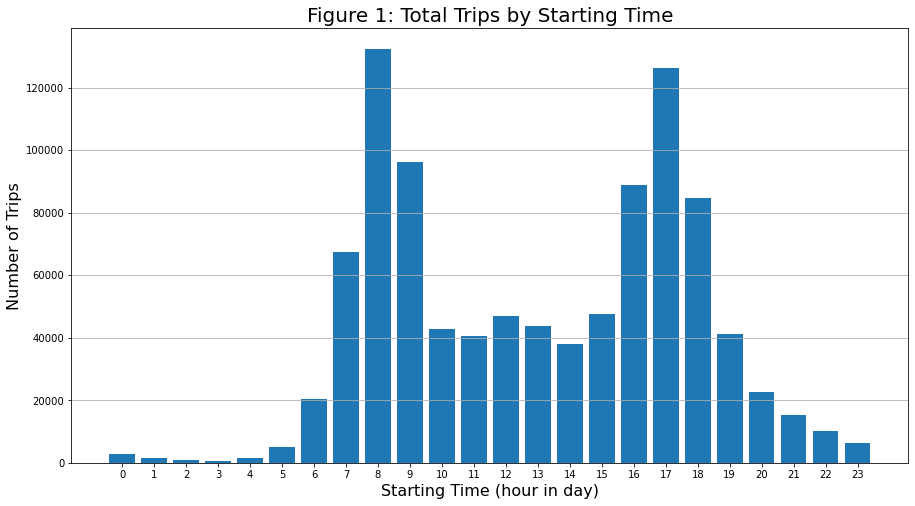

In [84]:
# Defining x and y for barchart
x = trips_by_hour.hour
height = trips_by_hour.num_trips

# Plotting
plt.figure(figsize = (15,8))
plt.bar(x,height)
plt.title("Figure 1: Total Trips by Starting Time",fontsize = 20)
plt.ylabel("Number of Trips",fontsize = 16)
plt.xlabel("Starting Time (hour in day)",fontsize = 16)
plt.xticks(ticks = x);
plt.grid(axis = 'y')

As you can see in figure 1, the two hours that have the most trips are 8am-8:59am and 5pm-5:59pm. This is interesting because these are within the same times that I defined as commuter trips. Figure 1 shows that our largest demographic for people interested in the bikeshare program is commuters. Commuters have a relatively inexpensive option to commute in taking the train. To compete with that, I recommend two suggestions.

My first suggestion is the "commuter plan". Since our target audience is commuters, I propose a discounted plan that allows people to start trips between 6am-10am and 3pm-7pm. This would cost 10 dollars per month as opposed to the standard 13 dollars per month. My second suggestion is providing a discount to the commuter plan if the customer provides proof of discontinuation of a separate public transportation plan. The discount would be three months of a commuter plan free if you show proof of discontinuation of public transport and you commit to a full years worth of membership. This gives our target audience even more incentive to use the bike share as their form of commuting.

Next, I would like to make a recommendation on city specific plans. To do this, we will need to understand which cities have the most trips within the dataset. The query below reports the total number of trips that start in specific cities. 

In [85]:
%%bigquery trips_by_city

# Finding Total Trips by City
SELECT landmark AS city,COUNT(*) AS trips
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` table1
    JOIN `bigquery-public-data.san_francisco.bikeshare_stations` table2 
    ON table1.start_station_id = table2.station_id
GROUP BY landmark
ORDER BY trips DESC

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.75rows/s]


In [86]:
trips_by_city

,city,trips
0,San Francisco,891223
1,San Jose,52861
2,Mountain View,24679
3,Palo Alto,9889
4,Redwood City,4996


The results above show that there are by far more trips in San Francisco than the other cities combined. This can be viewed as an opportunity to reach a new market. To do this, we will offer a discount for people not in San Francisco. We will offer 3 months free for any new customer who signs up for a yearlong membership in San Jose, Mountain View, Palo Alto, and Redwood City. The hope is that this will introduce many new customers in those cities that we will be able to retain.

The next aspect I would like to examine is underutilized bike stations. We will evaluate this by looking at which stations have the lowest total trafic per dock count. This means we take the number of trips that start at a station and divide it by the number of docks. This will give us a metric of traffic which is normalized by how large the station is. The query that calculates this is below. For the purposes of this query, we only considered dates after 8/4/16 because that is when the newest station in this dataset was built.

In [87]:
%%bigquery traffic_per_dock

# Finding traffic per dock available for all stations
SELECT station_id,name,dockcount,landmark AS city,
       COUNT(*) AS trips, ROUND(COUNT(*)/dockcount,2) AS total_traffic_per_dock
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` table1
    JOIN `bigquery-public-data.san_francisco.bikeshare_stations` table2 
    ON table1.start_station_id = table2.station_id
# Only considering data after installation of newest station
WHERE CAST(start_date AS date) > CAST('2016-08-04' AS date )
GROUP BY station_id,name,dockcount,landmark
ORDER BY total_traffic_per_dock
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.02rows/s]


In [88]:
traffic_per_dock

,station_id,name,dockcount,city,trips,total_traffic_per_dock
0,88,5th S. at E. San Salvador St,19,San Jose,3,0.16
1,30,Middlefield Light Rail Station,15,Mountain View,4,0.27
2,12,SJSU 4th at San Carlos,19,San Jose,16,0.84
3,33,Charleston Park/ North Bayshore Area,15,Mountain View,23,1.53
4,38,Park at Olive,15,Palo Alto,25,1.67


Based on this result, we can see that all stations with the lowest traffic per dock are outside of San Francisco. Since I have already suggested a discount for subscriptions outside of San Francisco, we will double down by offering discounts on one time rides. I suggest that one time rides outside of San Francisco cost two dollars and fifty cents instead of three dollars.

Another concern we might have is too many bikes getting stuck at a single station. To address this we will look at the stations that average the most bikes available. This is done in the query below.

In [89]:
%%bigquery avg_bikes_available

# Finding which stations on average have the most bikes available
SELECT station_id,ROUND(AVG(bikes_available),2) AS avg_bikes_available, 
       ROUND(AVG(docks_available),2) AS avg_docks_available
    FROM `bigquery-public-data.san_francisco.bikeshare_status`
# Getting rid of data where bikes and docks are both equal to zero
WHERE bikes_available > 0 OR docks_available > 0
GROUP BY station_id
ORDER BY avg_bikes_available DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.43rows/s]


In [90]:
avg_bikes_available

,station_id,avg_bikes_available,avg_docks_available
0,90,16.65,14.35
1,61,13.40,12.99
2,50,13.34,9.58
3,77,12.73,13.65
4,2,12.68,14.23


We would like to incentivize taking a bikes at a location that has a surplus. To do this, we will offer a 50 cent discount for taking a bike on a one time trip from stations 90, 61, 50, 77, and 2.

The final offer we would like to investigate is if there is a seasonal discount we should offer. To do this, we will examine the total number of trips taken in this dataset by month. This is done in the query below and the results are plotted in figure 2.

In [91]:
%%bigquery trips_by_month

# Finding total number of trips for each month
SELECT EXTRACT (MONTH FROM start_date) AS month,COUNT(*) AS num_trips
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    GROUP BY month
    ORDER BY num_trips DESC

Downloading: 100%|██████████| 12/12 [00:01<00:00,  8.22rows/s]


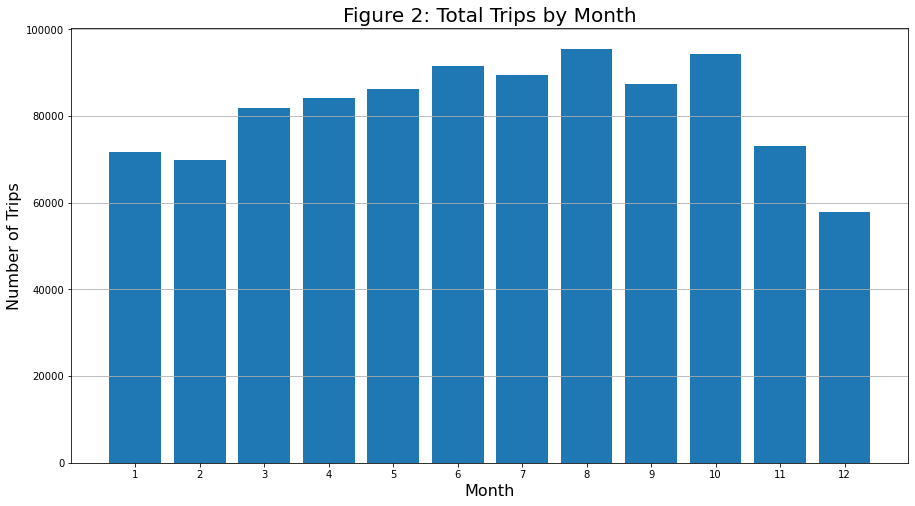

In [93]:
# Defining x and y for barchart
x = trips_by_month.month
height = trips_by_month.num_trips

# Plotting
plt.figure(figsize = (15,8))
plt.bar(x,height)
plt.title("Figure 2: Total Trips by Month",fontsize = 20)
plt.ylabel("Number of Trips",fontsize = 16)
plt.xlabel("Month",fontsize = 16)
plt.xticks(ticks = x);
plt.grid(axis = 'y')

As you can see, the trips are highest in the late summer and early fall. However, the difference is not substantial enough in my opinion to offer a discounted rate in the winter. My initial suspicion was that the trips would be substantially higher in the summer compared to winter and we would offer a some sort of discount in the winter. This is not necessary based on the fact that there is only a small difference between seasons in figure 2.